In [13]:
import ROOT as r
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import re
import math

In [21]:

file = r.TFile.Open("00289237_00000001_1.highstats-Small-B2OC-UP.root")
tree = file.Get("ST-b2oc")

# Create a canvas
canvas = r.TCanvas("canvas", "nPVs Distribution", 800, 600)

# Draw histogram of nPVs
tree.Draw("nPVs >> h_nPVs(26, -0.5, 25.5)")  # Adjust binning/range if needed

# Get the histogram and set axis titles
hist = r.gPad.GetPrimitive("h_nPVs")
hist.SetTitle("Distribution of nPVs;Number of Primary Vertices (nPVs);Events")
hist.SetLineColor(r.kBlue)
hist.SetLineWidth(2)

# Draw and show
canvas.Draw()
canvas.SaveAs("nPVs_distribution.png")  # Optional: save plot as PNG


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file nPVs_distribution.png has been created


In [2]:

import glob
import os

# Define the path pattern
file_pattern = "/Users/ary/Desktop/Ramon Data/Fitted_Data_Clean_Bp_P/2024/Real/B2OC/NEW B2OC/2024_B2OC_UP_B5_F10*.root"

# Find all matching files
file_paths = glob.glob(file_pattern)

# Sort for consistent order
file_paths.sort()

# Loop over files and compute statistics
for path in file_paths:
    file = r.TFile.Open(path)
    tree = file.Get("ST-b2oc")
    
    if not tree:
        print(f"Could not find tree in file: {path}")
        continue

    hist = r.TH1F("h_nPVs", "nPVs", 100, 0, 100)
    tree.Draw("nPVs >> h_nPVs", "", "goff")

    mean = hist.GetMean()
    stddev = hist.GetStdDev()

    filename = os.path.basename(path)
    print(f"{filename}: Mean nPVs = {mean:.2f}, StdDev = {stddev:.2f}")

    file.Close()


2024_B2OC_UP_B5_F10059.root: Mean nPVs = 6.13, StdDev = 2.46
2024_B2OC_UP_B5_F10061.root: Mean nPVs = 6.07, StdDev = 2.39
2024_B2OC_UP_B5_F10066.root: Mean nPVs = 6.03, StdDev = 2.42
2024_B2OC_UP_B5_F10069.root: Mean nPVs = 5.95, StdDev = 2.37
2024_B2OC_UP_B5_F10070.root: Mean nPVs = 5.87, StdDev = 2.34
2024_B2OC_UP_B5_F10072.root: Mean nPVs = 5.90, StdDev = 2.32
2024_B2OC_UP_B5_F10073.root: Mean nPVs = 5.97, StdDev = 2.38
2024_B2OC_UP_B5_F10074.root: Mean nPVs = 5.91, StdDev = 2.36
2024_B2OC_UP_B5_F10075.root: Mean nPVs = 5.94, StdDev = 2.36
2024_B2OC_UP_B5_F10077.root: Mean nPVs = 5.95, StdDev = 2.37
2024_B2OC_UP_B5_F10082.root: Mean nPVs = 5.96, StdDev = 2.37
2024_B2OC_UP_B5_F10084.root: Mean nPVs = 5.87, StdDev = 2.37
2024_B2OC_UP_B5_F10086.root: Mean nPVs = 6.03, StdDev = 2.38
2024_B2OC_UP_B5_F10087.root: Mean nPVs = 5.94, StdDev = 2.35
2024_B2OC_UP_B5_F10090.root: Mean nPVs = 5.97, StdDev = 2.36
2024_B2OC_UP_B5_F10091.root: Mean nPVs = 6.04, StdDev = 2.39
2024_B2OC_UP_B5_F10092.r

In [4]:
import glob
import os

#File path
file_pattern = '/Users/ary/Desktop/Ramon Data/Fitted_Data_Clean_Bp_P/2024_B2CC_UP_B5_F10*.root'

# Find all matching files
file_paths = glob.glob(file_pattern)

# Sort for consistent order
file_paths.sort()

# Loop over files and compute statistics
for path in file_paths:
    file = r.TFile.Open(path)
    tree = file.Get("ST-b2cc")
    
    if not tree:
        print(f"Could not find tree in file: {path}")
        continue

    hist = r.TH1F("h_nPVs", "nPVs", 100, 0, 100)
    tree.Draw("nPVs >> h_nPVs", "", "goff")

    mean = hist.GetMean()
    stddev = hist.GetStdDev()

    filename = os.path.basename(path)
    print(f"{filename}: Mean nPVs = {mean:.2f}, StdDev = {stddev:.2f}")

    file.Close()


2024_B2CC_UP_B5_F10059.root: Mean nPVs = 6.52, StdDev = 2.54
2024_B2CC_UP_B5_F10061.root: Mean nPVs = 6.42, StdDev = 2.44
2024_B2CC_UP_B5_F10066.root: Mean nPVs = 6.38, StdDev = 2.46
2024_B2CC_UP_B5_F10069.root: Mean nPVs = 6.28, StdDev = 2.42
2024_B2CC_UP_B5_F10070.root: Mean nPVs = 6.21, StdDev = 2.40
2024_B2CC_UP_B5_F10072.root: Mean nPVs = 6.22, StdDev = 2.37
2024_B2CC_UP_B5_F10073.root: Mean nPVs = 6.34, StdDev = 2.45
2024_B2CC_UP_B5_F10074.root: Mean nPVs = 6.26, StdDev = 2.42
2024_B2CC_UP_B5_F10075.root: Mean nPVs = 6.28, StdDev = 2.41
2024_B2CC_UP_B5_F10077.root: Mean nPVs = 6.29, StdDev = 2.42
2024_B2CC_UP_B5_F10082.root: Mean nPVs = 6.32, StdDev = 2.42
2024_B2CC_UP_B5_F10084.root: Mean nPVs = 6.22, StdDev = 2.43
2024_B2CC_UP_B5_F10086.root: Mean nPVs = 6.40, StdDev = 2.44
2024_B2CC_UP_B5_F10087.root: Mean nPVs = 6.28, StdDev = 2.41
2024_B2CC_UP_B5_F10090.root: Mean nPVs = 6.32, StdDev = 2.42
2024_B2CC_UP_B5_F10091.root: Mean nPVs = 6.41, StdDev = 2.45
2024_B2CC_UP_B5_F10092.r

In [8]:
import ROOT as r
import math

# Mean and std dev data for B2OC
b2oc_data = {
    10059: (6.13, 2.46), 10061: (6.07, 2.39), 10066: (6.03, 2.42), 10069: (5.95, 2.37),
    10070: (5.87, 2.34), 10072: (5.90, 2.32), 10073: (5.97, 2.38), 10074: (5.91, 2.36),
    10075: (5.94, 2.36), 10077: (5.95, 2.37), 10082: (5.96, 2.37), 10084: (5.87, 2.37),
    10086: (6.03, 2.38), 10087: (5.94, 2.35), 10090: (5.97, 2.36), 10091: (6.04, 2.39),
    10092: (5.93, 2.36), 10093: (6.02, 2.38), 10094: (6.05, 2.39), 10095: (5.92, 2.34),
    10096: (5.98, 2.36), 10097: (5.93, 2.34), 10098: (6.06, 2.41), 10099: (6.03, 2.39),
    10100: (5.93, 2.34)
}

# Mean and std dev data for B2CC
b2cc_data = {
    10059: (6.52, 2.54), 10061: (6.42, 2.44), 10066: (6.38, 2.46), 10069: (6.28, 2.42),
    10070: (6.21, 2.40), 10072: (6.22, 2.37), 10073: (6.34, 2.45), 10074: (6.26, 2.42),
    10075: (6.28, 2.41), 10077: (6.29, 2.42), 10082: (6.32, 2.42), 10084: (6.22, 2.43),
    10086: (6.40, 2.44), 10087: (6.28, 2.41), 10090: (6.32, 2.42), 10091: (6.41, 2.45),
    10092: (6.29, 2.42), 10093: (6.39, 2.44), 10094: (6.41, 2.44), 10095: (6.25, 2.40),
    10096: (6.34, 2.42), 10097: (6.28, 2.39), 10098: (6.39, 2.46), 10099: (6.35, 2.44),
    10100: (6.27, 2.40)
}

# Prepare data
x_vals, y_vals, y_errs = [], [], []

for fill in sorted(b2oc_data):
    if fill in b2cc_data:
        mu_oc, std_oc = b2oc_data[fill]
        mu_cc, std_cc = b2cc_data[fill]
        ratio = mu_oc / mu_cc
        ratio_err = ratio * math.sqrt((std_oc / mu_oc)**2 + (std_cc / mu_cc)**2)

        x_vals.append(fill)
        y_vals.append(ratio)
        y_errs.append(ratio_err)

# Create TGraphErrors
graph = r.TGraphErrors(len(x_vals))
for i in range(len(x_vals)):
    graph.SetPoint(i, x_vals[i], y_vals[i])
    graph.SetPointError(i, 0, y_errs[i])

# Draw the graph
canvas = r.TCanvas("c", "nPVs Ratio with Error", 1000, 600)
graph.SetTitle("Mean nPVs Ratio: B2OC / B2CC ;Fill Number;Ratio")
graph.SetMarkerStyle(20)
graph.SetMarkerSize(1)
graph.SetLineWidth(2)
graph.Draw("AP")

# Optional: adjust axis range
graph.GetXaxis().SetLimits(min(x_vals) - 1, max(x_vals) + 1)

# Linear fit over fill number range
fit_func = r.TF1("fit_func", "pol1", min(x_vals), max(x_vals))
graph.Fit(fit_func, "S")  # 'S' = silent (returns result)

# Style fit
fit_func.SetLineColor(r.kRed)
fit_func.SetLineWidth(2)

canvas.SetGrid()
canvas.Update()
canvas.SaveAs("nPVs_ratio_vs_fill_number.png")

# Print fit result
slope = fit_func.GetParameter(1)
intercept = fit_func.GetParameter(0)
print(f"Linear Fit: y = {intercept:.4f} + {slope:.4e} * FillNumber")


Linear Fit: y = 0.7036 + 2.3910e-05 * FillNumber
****************************************
Minimizer is Linear / Migrad
Chi2                      =  0.000476356
NDf                       =           23
p0                        =     0.703643   +/-   84.9877     
p1                        =  2.39098e-05   +/-   0.00842859  


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file nPVs_ratio_vs_fill_number.png has been created


In [3]:


# B2OC mean nPVs and stddev
b2oc_data = {
    10059: (6.13, 2.46), 10061: (6.07, 2.39), 10066: (6.03, 2.42), 10069: (5.95, 2.37),
    10070: (5.87, 2.34), 10072: (5.90, 2.32), 10073: (5.97, 2.38), 10074: (5.91, 2.36),
    10075: (5.94, 2.36), 10077: (5.95, 2.37), 10082: (5.96, 2.37), 10084: (5.87, 2.37),
    10086: (6.03, 2.38), 10087: (5.94, 2.35), 10090: (5.97, 2.36), 10091: (6.04, 2.39),
    10092: (5.93, 2.36), 10093: (6.02, 2.38), 10094: (6.05, 2.39), 10095: (5.92, 2.34),
    10096: (5.98, 2.36), 10097: (5.93, 2.34), 10098: (6.06, 2.41), 10099: (6.03, 2.39),
    10100: (5.93, 2.34)
}

# Create TGraphErrors
graph = r.TGraphErrors(len(b2oc_data))
for i, fill in enumerate(sorted(b2oc_data)):
    mean, std = b2oc_data[fill]
    graph.SetPoint(i, fill, mean)
    graph.SetPointError(i, 0, std)

# Draw
c = r.TCanvas("c", "B2OC Mean nPVs", 1000, 600)
graph.SetTitle("B2OC: Mean nPVs vs Fill Number;Fill Number;Mean nPVs")
graph.SetMarkerStyle(21)
graph.SetMarkerColor(r.kBlue)
graph.SetLineColor(r.kBlue)
graph.Draw("AP")

c.SetGrid()
c.SaveAs("B2OC_mean_nPVs_vs_fill.png")


Info in <TCanvas::Print>: png file B2OC_mean_nPVs_vs_fill.png has been created


Get nPVs Values

In [10]:
# B2OC mean nPVs and stddev
# Pattern to match your B2OC files
file_pattern = '/Users/ary/Desktop/Ramon Data/Fitted_Data_Clean_Bp_P/2024_B2OC_UP_B5_F10*.root'

# Output list
nPVs_data_b2oc = []

# Loop through matching files
for filepath in sorted(glob.glob(file_pattern)):
    # Extract fill number from filename
    match = re.search(r'F(\d+)', os.path.basename(filepath))
    if not match:
        continue
    fill_number = int(match.group(1))

    # Open ROOT file and get tree
    file = r.TFile.Open(filepath)
    tree = file.Get("ST-b2oc")
    if not tree:
        print(f"Warning: No tree found in {filepath}")
        continue

    # Create histogram and fill it
    hist = r.TH1F("h_nPVs", "", 100, 0, 100)
    tree.Draw("nPVs >> h_nPVs", "", "goff")

    mean = hist.GetMean()
    stddev = hist.GetStdDev()

    # Append to list
    nPVs_data_b2oc.append((fill_number, round(mean, 2), round(stddev, 2)))

    file.Close()

# # Print final list
# print("nPVs_data_b2oc = [")
# for entry in nPVs_data_b2oc:
#     print(f"    {entry},")
# print("]")


In [11]:
# B2CC mean nPVs and stddev
# Pattern to match your B2OC files
file_pattern = '/Users/ary/Desktop/Ramon Data/Fitted_Data_Clean_Bp_P/2024_B2CC_UP_B5_F10*.root'

# Output list
nPVs_data_b2cc = []

# Loop through matching files
for filepath in sorted(glob.glob(file_pattern)):
    # Extract fill number from filename
    match = re.search(r'F(\d+)', os.path.basename(filepath))
    if not match:
        continue
    fill_number = int(match.group(1))

    # Open ROOT file and get tree
    file = r.TFile.Open(filepath)
    tree = file.Get("ST-b2cc")
    if not tree:
        print(f"Warning: No tree found in {filepath}")
        continue

    # Create histogram and fill it
    hist = r.TH1F("h_nPVs", "", 100, 0, 100)
    tree.Draw("nPVs >> h_nPVs", "", "goff")

    mean = hist.GetMean()
    stddev = hist.GetStdDev()

    # Append to list
    nPVs_data_b2cc.append((fill_number, round(mean, 2), round(stddev, 2)))

    file.Close()

# # Print final list
# print("nPVs_data_b2cc = [")
# for entry in nPVs_data_b2cc:
#     print(f"    {entry},")
# print("]")


In [14]:
# Example: replace these with your full data


# Make dictionaries for easier lookup
b2oc_dict = {fill: (mean, std) for fill, mean, std in nPVs_data_b2oc}
b2cc_dict = {fill: (mean, std) for fill, mean, std in nPVs_data_b2cc}

# Final list of ratios with uncertainties
nPVs_data = []

for fill in sorted(b2oc_dict):
    if fill in b2cc_dict:
        A, sigma_A = b2oc_dict[fill]
        B, sigma_B = b2cc_dict[fill]

        if B == 0:
            print(f"Warning: Skipping fill {fill} due to zero denominator.")
            continue

        R = A / B
        sigma_R = R * math.sqrt((sigma_A / A)**2 + (sigma_B / B)**2)

        nPVs_data.append((fill, round(R, 3), round(sigma_R, 3)))

# Print result
print("nPVs_data = [")
for entry in nPVs_data:
    print(f"    {entry},")
print("]")

nPVs_data = [
    (10059, 0.94, 0.526),
    (10061, 0.945, 0.517),
    (10066, 0.945, 0.526),
    (10069, 0.947, 0.525),
    (10070, 0.945, 0.525),
    (10072, 0.949, 0.519),
    (10073, 0.942, 0.523),
    (10074, 0.944, 0.525),
    (10075, 0.946, 0.522),
    (10077, 0.946, 0.524),
    (10082, 0.943, 0.521),
    (10084, 0.944, 0.53),
    (10086, 0.942, 0.517),
    (10087, 0.946, 0.521),
    (10090, 0.945, 0.52),
    (10091, 0.942, 0.518),
    (10092, 0.943, 0.522),
    (10093, 0.942, 0.518),
    (10094, 0.944, 0.518),
    (10095, 0.947, 0.522),
    (10096, 0.943, 0.518),
    (10097, 0.944, 0.518),
    (10098, 0.948, 0.525),
    (10099, 0.95, 0.524),
    (10100, 0.946, 0.52),
]


nPVs per Fill Fit Simple Code

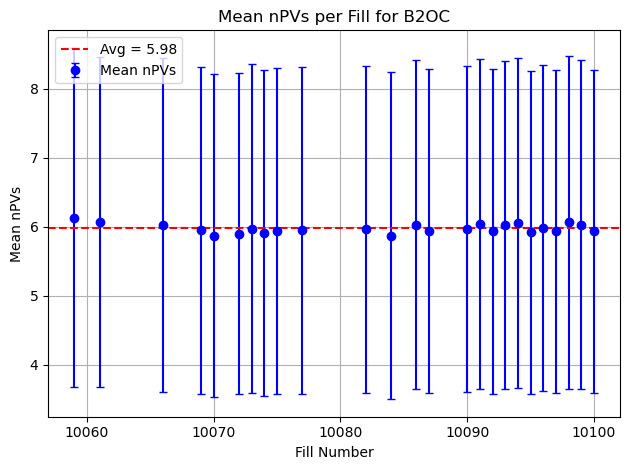

In [21]:

# Separate into x (fill), y (mean), and yerr (stddev)
fills = [entry[0] for entry in nPVs_data_b2oc]
means = [entry[1] for entry in nPVs_data_b2oc]
errors = [entry[2] for entry in nPVs_data_b2oc]

# Compute average (zero-order fit)
mean_average = np.mean(means)

# Plot with error bars
plt.errorbar(fills, means, yerr=errors, fmt='o', capsize=3, color='blue', label='Mean nPVs')
plt.axhline(mean_average, color='red', linestyle='--', label=f'Avg = {mean_average:.2f}')

# Labels and layout
plt.xlabel("Fill Number")
plt.ylabel("Mean nPVs")
plt.title("Mean nPVs per Fill for B2OC")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


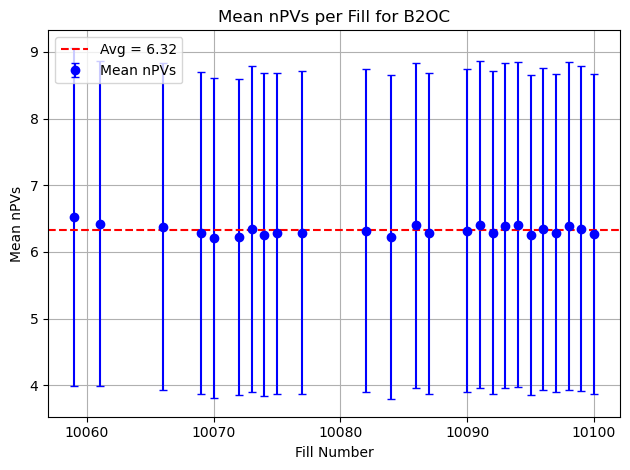

In [22]:

# Separate into x (fill), y (mean), and yerr (stddev)
fills = [entry[0] for entry in nPVs_data_b2cc]
means = [entry[1] for entry in nPVs_data_b2cc]
errors = [entry[2] for entry in nPVs_data_b2cc]

# Compute average (zero-order fit)
mean_average = np.mean(means)

# Plot with error bars
plt.errorbar(fills, means, yerr=errors, fmt='o', capsize=3, color='blue', label='Mean nPVs')
plt.axhline(mean_average, color='red', linestyle='--', label=f'Avg = {mean_average:.2f}')

# Labels and layout
plt.xlabel("Fill Number")
plt.ylabel("Mean nPVs")
plt.title("Mean nPVs per Fill for B2OC")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


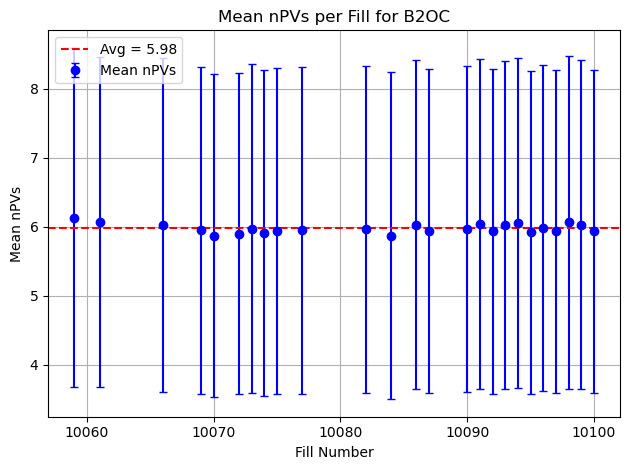

In [20]:


# Separate into x (fill), y (mean), and yerr (stddev)
fills = [entry[0] for entry in nPVs_data_b2oc]
means = [entry[1] for entry in nPVs_data_b2oc]
errors = [entry[2] for entry in nPVs_data_b2oc]

# Compute average (zero-order fit)
mean_average = np.mean(means)

# Plot with error bars
plt.errorbar(fills, means, yerr=errors, fmt='o', capsize=3, color='blue', label='Mean nPVs')
plt.axhline(mean_average, color='red', linestyle='--', label=f'Avg = {mean_average:.2f}')

# Labels and layout
plt.xlabel("Fill Number")
plt.ylabel("Mean nPVs")
plt.title("Mean nPVs per Fill for B2OC")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Block 5a vs 5b